### An Introduction to Bayesian Statistical Analysis

Answer all **Questions**

#### References:

- Practical methods for making inferences from data using probability models for quantities we observe and about which we wish to learn. Gelman et al. 2013*

- Bayesian Statistical Analysis in Python, Chris Fonnesbeck    
https://github.com/fonnesbeck/scipy2014_tutorial

- [Chapter 11 of Schaum's Outline of Probability and Statistics](https://www.kobo.com/us/en/ebook/schaum-s-outline-of-probability-and-statistics-4th-edition)

- [Introduction to Bayesian Statistics](https://www.stat.auckland.ac.nz/~brewer/stats331.pdf)

- [Bayesian Statistics](https://www.york.ac.uk/depts/maths/histstat/pml1/bayes/book.htm)


All conclusions from Bayesian statistical procedures are stated in terms of *probability statements*

![](images/prob_model.png)

This confers several benefits to the analyst, including:

- ease of interpretation, summarization of uncertainty
- can incorporate uncertainty in parent parameters
- easy to calculate summary statistics

### What is Probability?


#### 1. Classical probability

$Pr(X=x) = \frac{\text{# x outcomes}}{\text{# possible outcomes}}$

Classical probability is an assessment of **possible** outcomes of elementary events. Elementary events are assumed to be equally likely.

#### 2. Frequentist probability

$Pr(X=x) = \lim_{n \rightarrow \infty} \frac{\text{# times x has occurred}}{\text{# independent and identical trials}}$

This interpretation considers probability to be the relative frequency "in the long run" of outcomes.

#### 3. Subjective probability

$Pr(X=x)$

Subjective probability is a measure of one's uncertainty in the value of \\(X\\). It characterizes the state of knowledge regarding some unknown quantity using probability.

It is not associated with long-term frequencies nor with equal-probability events.

For example:

- X = the true prevalence of diabetes in Austin is < 15%
- X = the blood type of the person sitting next to you is type A
- X = the Nashville Predators will win next year's Stanley Cup
- X = it is raining in Nashville


### Bayesian vs Frequentist Statistics: 

Any statistical paradigm, Bayesian or otherwise, involves at least the following: 

1. Some **unknown quantities** about which we are interested in learning or testing. We call these *parameters*.
2. Some **data** which have been observed, and hopefully contain information about (1).
3. One or more **models** that relate the data to the parameters, and is the instrument that is used to learn.


### The Frequentist World View

- The data that have been observed are considered **random**, because they are realizations of random processes, and hence will vary each time one goes to observe the system.
- Model parameters are considered **fixed**. The parameters' values are unknown, but they are fixed, and so we *condition* on them.

In mathematical notation, this implies a (very) general model of the following form:

$f(y | \theta)$

The model $f$ accepts data values $y$ as an argument, conditional on particular values of $\theta$.

Frequentist inference typically involves deriving **estimators** for the unknown parameters. Estimators are formulae that return estimates for particular estimands, as a function of data. They are selected based on some chosen optimality criterion, such as *unbiasedness*, *variance minimization*, or *efficiency*.

For example, lets say that we have collected some data on the prevalence of autism spectrum disorder (ASD) in some defined population. Our sample includes $n$ sampled children, $y$ of them having been diagnosed with autism. A frequentist estimator of the prevalence $p$ is:

$\hat{p} = \frac{y}{n}$

Why this particular function? Because it can be shown to be unbiased and minimum-variance.

It is important to note that new estimators need to be derived for every estimand that is introduced.

### The Bayesian World View

- Data are considered **fixed**. 
- Model parameters themselves may not be random, but Bayesians use probability distribtutions to describe their uncertainty in parameter values, and are therefore treated as **random**. In some cases, it is useful to consider parameters as having been sampled from probability distributions.

This implies the following form:

$p(\theta | y)$

This formulation used to be referred to as ***inverse probability***, because it infers from observations to parameters, or from effects to causes.

Bayesians do not seek new estimators for every estimation problem they encounter. There is only one estimator for Bayesian inference: **Bayes' Formula**.

## Bayes' Formula

Given two events A and B, the conditional probability of A given that B is true is expressed as follows:

$Pr(A|B) = \frac{Pr(B|A)Pr(A)}{Pr(B)}$

where P(B)>0. Although Bayes' theorem is a fundamental result of probability theory, it has a specific interpretation in Bayesian statistics. 

In the above equation, A usually represents a proposition (such as the statement that a coin lands on heads fifty percent of the time) and B represents the evidence, or new data that is to be taken into account (such as the result of a series of coin flips). P(A) is the **prior** probability of A which expresses one's beliefs about A before evidence is taken into account. The prior probability may also quantify prior knowledge or information about A. 

P(B|A) is the **likelihood**, which can be interpreted as the probability of the evidence B given that  A is true. The likelihood quantifies the extent to which the evidence B supports the proposition A. 

P(A|B) is the **posterior** probability, the probability of the proposition A after taking the evidence B into account. Essentially, Bayes' theorem updates one's prior beliefs P(A) after considering the new evidence B.

P(B) is the **marginal likelihood**, which can be interpreted as the sum of the conditional probability of B under all possible events $A_i$
in the sample
space 

- For two events $P(B) = P(B|A)P(A) + P(B|\bar{A})P(\bar{A})$


### Example: Genetic probabilities

Let's put Bayesian inference into action using a very simple example. I've chosen this example because it is one of the rare occasions where the posterior can be calculated by hand. We will show how data can be used to update our belief in competing hypotheses.

Hemophilia is a rare genetic disorder that impairs the ability for the body's clotting factors to coagualate the blood in response to broken blood vessels. The disease is an **x-linked recessive** trait, meaning that there is only one copy of the gene in males but two in females, and the trait can be masked by the dominant allele of the gene. 

This implies that males with 1 gene are *affected*, while females with 1 gene are unaffected, but *carriers* of the disease. Having 2 copies of the disease is fatal, so this genotype does not exist in the population.

In this example, consider a woman whose mother is a carrier (because her brother is affected) and who marries an unaffected man. Let's now observe some data: the woman has two consecutive (non-twin) sons who are unaffected. We are interested in determining **if the woman is a carrier**.

![hemophilia](hemophilia.png)

To set up this problem, we need to set up our probability model. The unknown quantity of interest is simply an indicator variable \\(W\\) that equals 1 if the woman is affected, and zero if she is not. We are interested in the probability that the variable equals one, given what we have observed:

\\[Pr(W=1 | s_1=0, s_2=0)\\]

Our prior information is based on what we know about the woman's ancestry: her mother was a carrier. Hence, the prior is \\(Pr(W=1) = 0.5\\). Another way of expressing this is in terms of the **prior odds**, or:

\\[O(W=1) = \frac{Pr(W=1)}{Pr(W=0)} = 1\\]

Now for the likelihood: The form of this function is:

$$L(W | s_1=0, s_2=0)$$

This can be calculated as the probability of observing the data for any passed value for the parameter. For this simple problem, the likelihood takes only two possible values:

$$\begin{aligned}
L(W=1 &| s_1=0, s_2=0) = (0.5)(0.5) = 0.25 \cr
L(W=0 &| s_1=0, s_2=0) = (1)(1) = 1
\end{aligned}$$

With all the pieces in place, we can now apply Bayes' formula to calculate the posterior probability that the woman is a carrier:

$$\begin{aligned}
Pr(W=1 | s_1=0, s_2=0) &= \frac{L(W=1 | s_1=0, s_2=0) Pr(W=1)}{L(W=1 | s_1=0, s_2=0) Pr(W=1) + L(W=0 | s_1=0, s_2=0) Pr(W=0)} \cr
 &= \frac{(0.25)(0.5)}{(0.25)(0.5) + (1)(0.5)} \cr
 &= 0.2
\end{aligned}$$

Hence, there is a 0.2 probability of the woman being a carrier.

Its a bit trivial, but we can code this in Python:

#### Question 

- Calculate the likelihood, L
- Use likelihood, prior, and marginal likelihood to calculate posterior.
- Repeat the process with additional evidence.

In [35]:
# Create likelihood function 
'''
L(W, s)
- W = equals 1 if the woman is affected, and zero if she is not
- s = [s_1, s_2], s = 0 if no gene, s=1 if carrier 
'''

import numpy as np
prior = 0.5
p = 0.5

# Your work here - likelihood function

def L(W, s):
    like = []
    for sib in s:
        if W == 1:
            like.append(1)
        elif W == 0:
            like.append(p)
    Likelihood = 1
    for prob in like:
        Likelihood *= prob
    return Likelihood

In [36]:
# Calculate posterior
s = [0,0]
# your work here
def probability(prior, s):
    return L(0, s) * prior / ( (L(1, s) * (1-prior)) + (L(0, s) *prior) )
    
post = probability(prior, s) 

print(post)

0.2


#### Question:

Now, what happens if the woman has a third unaffected child? What is our estimate of her probability of being a carrier then? 

Bayes' formula makes it easy to update analyses with new information in a sequential fashion. 

Assign the posterior from the previous analysis to be the prior for the new analysis, and proceed as before:

In [37]:
# Likelihood
L(1, [0])

1

In [38]:
# Set prior to old posterior
s = [0]
prior = post

post_new = probability(prior, s)

# your work here
post_new

0.11111111111111112

Thus, observing a third unaffected child has further reduced our belief that the mother is a carrier.

## More on Bayesian Terminology

Replacing Bayes' Formula with conventional Bayes terms:

<img src="bayes_formula.png" width="200px"/>

The equation expresses how our belief about the value of \\(\theta\\), as expressed by the **prior distribution** \\(P(\theta)\\) is reallocated following the observation of the data \\(y\\), as expressed by the posterior distribution the posterior distribution.

#### Marginal

The denominator $P(y)$ is the likelihood integrated over all $\theta$:

$Pr(\theta|y) = \frac{Pr(y|\theta)Pr(\theta)}{\int Pr(y|\theta)Pr(\theta) d\theta}$

This usually cannot be calculated directly. However it is just a normalization constant which doesn't depend on the parameter.

The act of summation washes out whatever info we had about the parameter. Hence it can often be ignored. The normalizing constant makes sure that the resulting posterior distribution is a true probability distribution by ensuring that the sum of the distribution is equal to 1.

In some cases we don’t care about this property of the distribution. We only care about where the peak of the distribution occurs, regardless of whether the distribution is normalised or not

Unfortunately sometimes we are obliged to calculate it. The intractability of this integral is one of the factors that has contributed to the under-utilization of Bayesian methods by statisticians.

#### Prior

Once considered a controversial aspect of Bayesian analysis, the prior distribution characterizes what is known about an unknown quantity before observing the data from the present study. 

It represents the information state of that parameter. It can be used to reflect the information obtained in previous studies, to constrain the parameter to plausible values, or to represent the population of possible parameter values, of which the current study's parameter value can be considered a sample.


#### Likelihood

The likelihood represents the information in the observed data, and is used to update prior distributions to posterior distributions. This updating of belief is justified becuase of the **likelihood principle**, which states:

> Following observation of $y$, the likelihood $L(\theta|y)$ contains all experimental information from $y$ about the unknown $\theta$.

Bayesian analysis satisfies the likelihood principle because the posterior distribution's dependence on the data is only through the likelihood. In comparison, most frequentist inference procedures violate the likelihood principle, because inference will depend on the design of the trial or experiment.

What is a likelihood function? It is closely related to the probability density (or mass) function. Taking a common example, consider some data that are binomially distributed (that is, they describe the outcomes of $n$ binary events). Here is the binomial sampling distribution:

$p(Y|\theta) = {n \choose y} \theta^{y} (1-\theta)^{n-y}$

We can code this  in Python:

In [52]:
from scipy.special import comb
import matplotlib.pyplot as plt

pbinom = lambda y, n, p: comb(n, y) * p**y * (1-p)**(n-y)

This function returns the probability of observing \\(y\\) events from \\(n\\) trials, where events occur independently with probability \\(p\\).

In [53]:
pbinom(3, 10, 0.5)

0.1171875

In [54]:
pbinom(1, 25, 0.5)

7.450580596923828e-07

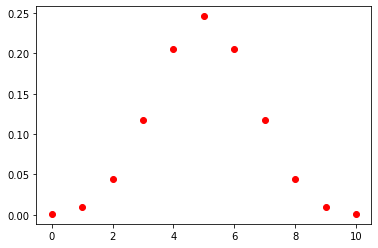

In [55]:
yvals = range(10+1)
plt.plot(yvals, [pbinom(y, 10, 0.5) for y in yvals], 'ro');

What about the likelihood function? 

The likelihood function is the exact same form as the sampling distribution, except that we are now interested in varying the parameter for a given dataset.

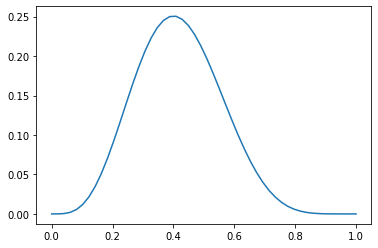

In [57]:
pvals = np.linspace(0, 1)
y = 4
plt.plot(pvals, [pbinom(y, 10, p) for p in pvals]);

So, though we are dealing with the same equation, these are different functions. The distribution is discrete, while the likelihood is continuous. The distribtion's range is from 0 to 10, while the likelihood's is 0 to 1. The distribution integrates (sums) to one, while the likelhood does not.

### Posterior

The mathematical form \\(p(\theta | y)\\) that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior: later in time; subsequent (after receiving evidence).

Why posterior? Because it tells us what we know about the unknown $\theta$ *after* having observed $y$.

#### Bayesian Summary

The Bayesian approach is attractive because it is useful. Its usefulness derives in large measure from its simplicity. Its simplicity allows the investigation of far more complex models than can be handled by the tools in the classical toolbox.  

There is just one estimator in Bayesian inference, which lends to its ***simplicity***. Moreover, Bayes affords a conceptually simple way of coping with multiple parameters. The use of probabilistic models allows very complex models to be assembled in a modular fashion, by factoring a large joint model into the product of several conditional probabilities.

Bayesian statistics is also attractive for its ***coherence***. All unknown quantities for a particular problem are treated as random variables, to be estimated in the same way. Existing knowledge is given precise mathematical expression, allowing it to be integrated with information from the study dataset, and there is formal mechanism for incorporating new information into an existing analysis.

Finally, Bayesian statistics confers an advantage in the ***interpretability*** of analytic outputs. Because models are expressed probabilistically, results can be interpreted probabilistically. Probabilities are easy for users (particularly non-technical users) to understand and apply.

### Example: confidence vs. credible intervals

A commonly-used measure of uncertainty for a statistical point estimate in classical statistics is the ***confidence interval***. 

Here is the mathematical definition of a 95% confidence interval for some unknown scalar quantity $\theta$:

$Pr(a(Y) < \theta < b(Y) | \theta) = 0.95$

How the endpoints of this interval are calculated varies according to the sampling distribution of $Y$, for example, the confidence interval for the population mean when $Y$ is normally distributed is calculated by:

$Pr(\bar{Y} - 1.96\frac{\sigma}{\sqrt{n}}< \theta < \bar{Y} + 1.96\frac{\sigma}{\sqrt{n}}) = 0.95$

It would be tempting to use this definition to conclude that there is a 95% chance $\theta$ is between $a(Y)$ and $b(Y)$, but that would be a mistake. 

Recall that for frequentists, unknown parameters are **fixed**, which means there is no probability associated with them being any value except what they are fixed to. Here, the interval itself, and not \\(\theta\\) is the random variable. The actual interval calculated from the data is just one possible realization of a random process, and it must be strictly interpreted only in relation to an infinite sequence of identical trials that might be (but never are) conducted in practice.

A valid interpretation of the above would be:

> If the experiment were repeated an infinite number of times, 95% of the calculated intervals would contain $\theta$.

This is what the statistical notion of "confidence" entails, and this sets it apart from probability intervals.

Since they regard unknown parameters as random variables, Bayesians can and do use probability intervals to describe what is known about the value of an unknown quantity. These intervals are commonly known as ***credible intervals***.

The definition of a 95% credible interval is:

$Pr(a(y) < \theta < b(y) | Y=y) = 0.95$

Notice that we condition here on the data $y$ instead of the unknown $\theta$. Thus, the endpoints are fixed and the variable is random. 

We are allowed to interpret this interval as:

> There is a 95% chance $\theta$ is between $a$ and \$b$.

Hence, the credible interval is a statement of what we know about the value of $\theta$ based on the observed data.

### Bayesian Inference Steps

Gelman et al. (2013) describe the process of conducting Bayesian statistical analysis in 3 steps:

#### Step 1: Specify a probability model

As was noted above, Bayesian statistics involves using probability models to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density.

This step involves making choices.

- what is the form of the sampling distribution of the data?
- what form best describes our uncertainty in the unknown parameters?

#### Step 2: Calculate a posterior distribution

The posterior distribution is formulated as a function of the probability model that was specified in Step 1. Usually, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest is perhaps the major contributing factor for the lack of widespread adoption of Bayesian methods for data analysis.

**But**, once the posterior distribution is calculated, you get a lot for free:

- point estimates
- credible intervals
- quantiles
- predictions

#### Step 3: Check your model

Though frequently ignored in practice, it is critical that the model and its outputs be assessed before using the outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- does the model fit data?
- are the conclusions reasonable?
- are the outputs sensitive to changes in model structure?
